<h2><center>Group 20</center></h2>
<h3><center>Jainit Patel - 201801172</center></h3>
<h3><center>Raj Desai - 201801183</center></h3>
<h3><center>Chirag Gupta - 201801188</center></h3>
<h3><center>Meet Parmar - 201801195</center></h3>
<h3><center>Raj Bhavsar - 201801437</center></h3>

# Speech Emotion Recognition using Convolutional Neural network

In [ ]:
# Mounting Google Drive so that Data can be used directly from linked drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Librosa library for extracting important features of 
# the audio like the pitch,tone.
!pip install librosa

# Loading dataset from csv file

From feature extraction, we stored mfcc in csv file 

In [ ]:
#Loading MFCCs and emotions of all files
import time

starting_time = time.time()
data = pd.read_csv('/content/drive/MyDrive/ML/RAVTESS_MFCC_Observed.csv')
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.49177980422973633ms
   Unnamed: 0           0          1  ...         38         39    emotion
0        2842 -520.823303  75.906799  ...  19.813313  10.987593    neutral
1        3247 -423.271484  77.593124  ...   2.209725   2.348104    disgust
2         610 -715.503662  69.203728  ...  -2.218677  -2.971524       calm
3         634 -537.216003  46.795460  ...   4.379309   3.290406        sad
4         535 -589.433960  52.526531  ...  -0.472045   0.445019  surprised

[5 rows x 42 columns]


In [ ]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [ ]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

print(X.shape)

np.unique(y)

(4240, 40)


array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

In [ ]:
# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fear, 6 = disgust, 7 = surprised 
d = dict()
d['neutral'] = 0
d['calm'] = 1
d['happy'] = 2
d['sad'] = 3
d['angry'] = 4
d['fear'] = 5
d['disgust'] = 6
d['surprised'] = 7

for i in range(len(y)):
  y[i] = d[y[i]]

y=y.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

# Convolutional Neural network

### Max Pooling 

In [ ]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((3392, 40, 1), (848, 40, 1))

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
212/212 [==============================] - 5s 17ms/step - loss: 3.7938 - accuracy: 0.2090 - val_loss: 1.4870 - val_accuracy: 0.4151
Epoch 2/200
212/212 [==============================] - 4s 17ms/step - loss: 2.2775 - accuracy: 0.3670 - val_loss: 1.2043 - val_accuracy: 0.5767
Epoch 3/200
212/212 [==============================] - 3s 16ms/step - loss: 1.6255 - accuracy: 0.4929 - val_loss: 1.0751 - val_accuracy: 0.6462
Epoch 4/200
212/212 [==============================] - 4s 17ms/step - loss: 1.4288 - accuracy: 0.5628 - val_loss: 1.0073 - val_accuracy: 0.6675
Epoch 5/200
212/212 [==============================] - 3s 16ms/step - loss: 1.2382 - accuracy: 0.6061 - val_loss: 0.9693 - val_accuracy: 0.6792
Epoch 6/200
212/212 [==============================] - 3s 16ms/step - loss: 1.1227 - accuracy: 0.6524 - val_loss: 0.9568 - val_accuracy: 0.6863
Epoch 7/200
212/212 [==============================] - 4s 17ms/step - loss: 1.0667 - accuracy: 0.6610 - val_loss: 0.8830 - val_accuracy:

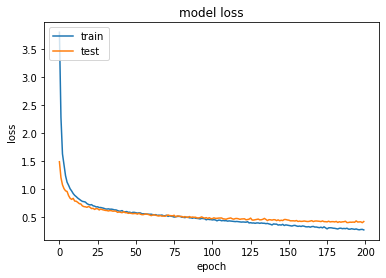

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

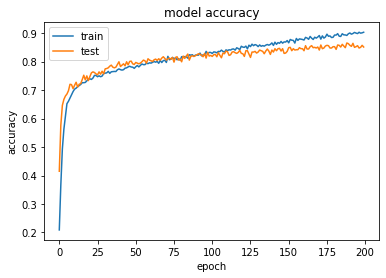

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predict_x = model.predict(x_testcnn)
predictions=np.argmax(predict_x,axis=1)

In [ ]:
new_Ytest = y_test.astype(int)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91        90
           1       0.62      0.82      0.70        45
           2       0.77      0.83      0.80       109
           3       0.84      0.85      0.84       123
           4       0.93      0.91      0.92       109
           5       0.89      0.85      0.87       120
           6       0.93      0.82      0.87       146
           7       0.79      0.90      0.84       106

    accuracy                           0.85       848
   macro avg       0.84      0.85      0.84       848
weighted avg       0.86      0.85      0.85       848



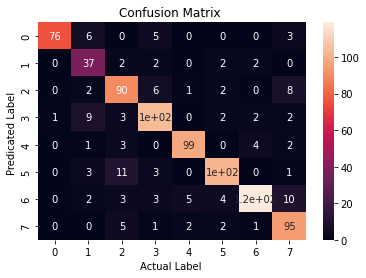

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
confusionMatrix = confusion_matrix(new_Ytest, predictions)
sb.heatmap( confusionMatrix , annot = True )
plt.ylabel('Predicated Label ')
plt.xlabel('Actual Label ')
plt.title('Confusion Matrix ')
plt.show()

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

### Average Pooling

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(AveragePooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(AveragePooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 40, 64)            384       
                                                                 
 activation_4 (Activation)   (None, 40, 64)            0         
                                                                 
 dropout_3 (Dropout)         (None, 40, 64)            0         
                                                                 
 average_pooling1d (AverageP  (None, 10, 64)           0         
 ooling1D)                                                       
                                                                 
 conv1d_4 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_5 (Activation)   (None, 10, 128)           0         
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
212/212 [==============================] - 4s 17ms/step - loss: 1.9605 - accuracy: 0.2518 - val_loss: 1.7010 - val_accuracy: 0.5436
Epoch 2/200
212/212 [==============================] - 3s 16ms/step - loss: 1.6127 - accuracy: 0.4472 - val_loss: 1.4212 - val_accuracy: 0.5354
Epoch 3/200
212/212 [==============================] - 3s 16ms/step - loss: 1.3735 - accuracy: 0.5410 - val_loss: 1.2289 - val_accuracy: 0.5991
Epoch 4/200
212/212 [==============================] - 3s 16ms/step - loss: 1.2339 - accuracy: 0.5887 - val_loss: 1.1386 - val_accuracy: 0.5943
Epoch 5/200
212/212 [==============================] - 3s 16ms/step - loss: 1.1423 - accuracy: 0.6141 - val_loss: 1.0748 - val_accuracy: 0.6533
Epoch 6/200
212/212 [==============================] - 3s 16ms/step - loss: 1.0868 - accuracy: 0.6462 - val_loss: 1.0407 - val_accuracy: 0.6639
Epoch 7/200
212/212 [==============================] - 3s 16ms/step - loss: 1.0388 - accuracy: 0.6551 - val_loss: 1.0038 - val_accuracy:

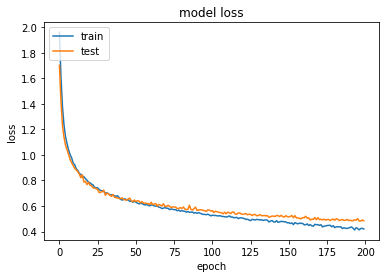

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

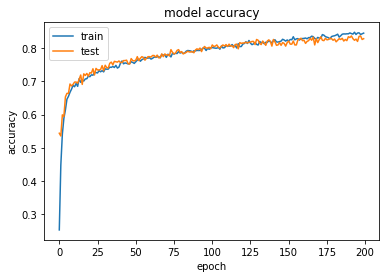

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predict_x = model.predict(x_testcnn)
predictions=np.argmax(predict_x,axis=1)

In [ ]:
new_Ytest = y_test.astype(int)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        90
           1       0.59      0.58      0.58        45
           2       0.80      0.79      0.79       109
           3       0.83      0.84      0.83       123
           4       0.86      0.87      0.87       109
           5       0.78      0.89      0.83       120
           6       0.88      0.82      0.84       146
           7       0.84      0.84      0.84       106

    accuracy                           0.83       848
   macro avg       0.81      0.81      0.81       848
weighted avg       0.83      0.83      0.83       848



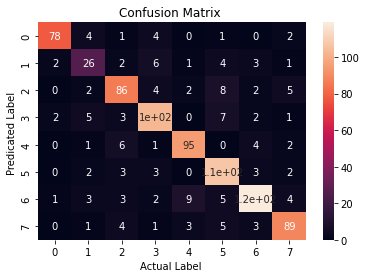

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
confusionMatrix = confusion_matrix(new_Ytest, predictions)
sb.heatmap( confusionMatrix , annot = True )
plt.ylabel('Predicated Label ')
plt.xlabel('Actual Label ')
plt.title('Confusion Matrix ')
plt.show()
